# Viewing and manipulating data from FITS tables

## Authors
Lia Corrales, Kris Stern

## Learning Goals
* Download a FITS table file from a URL 
* Open a FITS table file and view table contents
* Make a 2D histogram with the table data
* Close the FITS file after use

## Keywords
FITS, file input/output, table, numpy, matplotlib, histogram


## Summary

This tutorial demonstrates the use of `astropy.utils.data` to download a data file, then uses `astropy.io.fits` and `astropy.table` to open the file. Lastly, `matplotlib` is used to visualize the data as a histogram.

In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The following line is needed to download the example FITS files used in this tutorial.

In [2]:
from astropy.utils.data import download_file

FITS files often contain large amounts of multi-dimensional data and tables.  

In this particular example, we'll open a FITS file from a Chandra observation of the Galactic Center.  The file contains a list of events with x and y coordinates, energy, and various other pieces of information.

In [3]:
event_filename = download_file('http://data.astropy.org/tutorials/FITS-tables/chandra_events.fits', 
                               cache=True)

## Opening the FITS file and viewing table contents

Since the file is big, let's open it with `memmap=True` to prevent RAM storage issues.

In [4]:
hdu_list = fits.open(event_filename, memmap=True)

In [5]:
hdu_list.info()

Filename: /Users/sunil/.astropy/cache/download/py3/26e9900d731d08997d99ada3973f4592
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


In this case, we're interested in reading EVENTS, which contains information about each X-ray photon that hit the detector.

To find out what information the table contains, let's print the column names.

In [6]:
print(hdu_list[1].columns)

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'; coord_type = 'CPCX'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'chipy'; format = '1I'; unit = 'pixel'; coord_type = 'CPCY'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'; coord_type = 'LONG-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'dety'; format = '1E'; unit = 'pixel'; coord_type = 'NPOL-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'x'; format = '1E'; unit = 'pixel'; coord_type = 'RA---TAN'; c

Now we'll take this data and convert it into an [astropy table](http://docs.astropy.org/en/stable/table/). While it's possible to access FITS tables directly from the ``.data`` attribute, using [Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table) tends to make a variety of common tasks more convenient.

In [7]:
evt_data = Table(hdu_list[1].data)

For example, a preview of the table is easily viewed by simply running a cell with the table as the last line:

In [8]:
evt_data
#evt_data[:5]['energy']

time,ccd_id,node_id,expno,chipx,chipy,tdetx,tdety,detx,dety,x,y,pha,pha_ro,energy,pi,fltgrade,grade,status [32]
float64,int16,int16,int32,int16,int16,int16,int16,float32,float32,float32,float32,int32,int32,float32,int32,int16,int16,bool
238623220.9093583,3,3,68,920,8,5124,3981,5095.641,4138.995,4168.0723,5087.772,3548,3534,13874.715,951,16,4,False .. False
238623220.9093583,3,1,68,437,237,4895,3498,4865.567,4621.1826,3662.1968,4915.9336,667,629,2621.1938,180,64,2,False .. False
238623220.9093583,3,2,68,719,289,4843,3780,4814.835,4340.254,3935.2207,4832.552,3033,2875,12119.018,831,8,3,False .. False
238623220.9093583,3,0,68,103,295,4837,3164,4807.3643,4954.385,3324.4644,4897.2754,831,773,3253.0364,223,0,0,False .. False
238623220.9093583,3,1,68,498,314,4818,3559,4788.987,4560.3276,3713.6343,4832.735,3612,3439,14214.382,974,64,2,False .. False
238623220.9093583,3,3,68,791,469,4663,3852,4635.4526,4268.053,3985.8496,4645.93,500,438,1952.7239,134,0,0,False .. False
238623220.9093583,3,3,68,894,839,4293,3955,4266.642,4165.3203,4044.5469,4267.605,835,713,3267.5334,224,0,0,False .. False
238623220.9093583,3,3,68,857,941,4191,3918,4164.815,4202.2256,3995.9353,4170.818,975,804,3817.0366,262,0,0,False .. False
238623220.9093583,3,3,68,910,959,4173,3971,4146.9937,4149.364,4046.3376,4146.9106,576,446,2252.7295,155,0,0,False .. False


We can extract data from the table by referencing the column name. Let's try making a histogram for the energy of each photon, which will give us a sense for the spectrum (folded with the detector's efficiency).

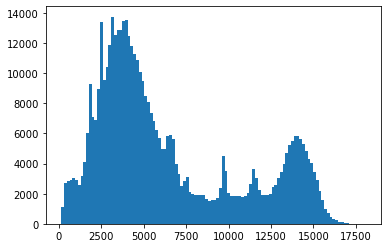

In [9]:
energy_hist = plt.hist(evt_data['energy'], bins='auto')

## Making a 2D histogram with some table data

We'll make an image by binning the x and y coordinates of the events into a 2D histogram.

This particular observation spans five CCD chips.  First, we determine the events that only fell on the main (ACIS-I) chips, which have number ids 0, 1, 2, and 3.

In [10]:
ii = np.in1d(evt_data['ccd_id'], [0, 1, 2, 3])
np.sum(ii)

434858

### Method 1: Use numpy to make a 2D histogram and imshow to display it

This method allows us to create an image without stretching:

Text(0, 0.5, 'y')

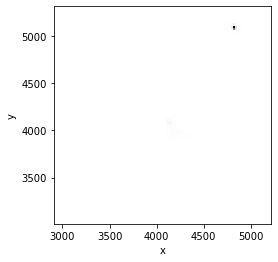

In [11]:
NBINS = (100,100)

img_zero, yedges, xedges = np.histogram2d(evt_data['x'][ii], evt_data['y'][ii], NBINS)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(img_zero, extent=extent, interpolation='nearest', cmap='gist_yarg', origin='lower')

plt.xlabel('x')
plt.ylabel('y')

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

### Method 2: Use hist2d with a log-normal color scheme

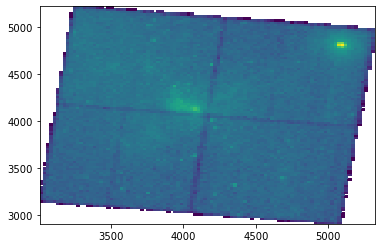

In [12]:
a=plt.hist2d(evt_data['x'][ii],evt_data['y'][ii],NBINS,norm=LogNorm())

Text(0, 0.5, 'y')

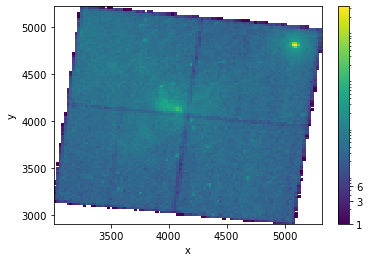

In [13]:
NBINS = (100,100)
img_zero_mpl = plt.hist2d(evt_data['x'][ii], evt_data['y'][ii], NBINS, 
                          cmap='viridis', norm=LogNorm())

cbar = plt.colorbar(ticks=[1.0,3.0,6.0])
cbar.ax.set_yticklabels(['1','3','6'])

plt.xlabel('x')
plt.ylabel('y')

## Close the FITS file

When you're done using a FITS file, it's often a good idea to close it.  That way you can be sure it won't continue using up excess memory or file handles on your computer.  (This happens automatically when you close Python, but you never know how long that might be...)

In [14]:
#hdu_list.close()

## Exercises

Make a scatter plot of the same data you histogrammed above.  The [plt.scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function is your friend for this.  What are the pros and cons of doing it this way?

<IPython.core.display.Javascript object>


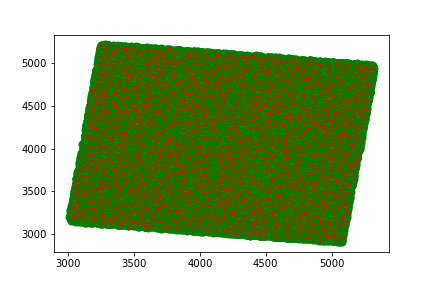

In [41]:
%matplotlib notebook
color_City_A = 'red'
lineStyle_City_A={"linestyle":"-", "linewidth":2, "edgecolor":"green"}
plt.scatter(evt_data['x'][ii],evt_data['y'][ii],**lineStyle_City_A, color=color_City_A)
plt.show()

Try the same with the [plt.hexbin](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hexbin) plotting function. Which do you think looks better for this kind of data?

Choose an energy range to make a slice of the FITS table, then plot it. How does the image change with different energy ranges?